<a href="https://colab.research.google.com/github/Anitayea/Linear_and_Nonlinear_Optimization/blob/recitations/Recitation7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recitation 7



*   Review quiz 6
*   Gurobi comment
*   Questions
*   Review homework 2



## Quiz 6

1) [T/F] If the shortest path problem has a solution, then the length of the shortest path can't be larger than the number of nodes.

ANSWER: True - if the path is larger than the number of nodes then you've been to one node more than once so between the two visits to that node there is a loop that can be removed and resulting path optimal.

---

2) [T/F] If the shortest path problem has a solution, then the length of the shortest path can't be larger than the number of arcs.

ANSWER: True - if your path is larger than the number of arcs, you've revisted a node at least once and we are back to the case of question 1.

---

3) Consider a network with nodes $\mathcal{Z}=\left\{ 1,2,3,4,5\right\} $

and arcs $\mathcal{A}=\left\{ \left( 1,3\right) ,\left( 1,4\right) ,\left(
1,5\right) ,\left( 2,3\right) ,\left( 2,4\right) ,\left( 2,5\right) ,\left(
3,4\right) ,\left( 3,5\right) \right\} $ where

$q_{1}=-1$,$q_{2}=-3$, $q_{3}=0$, $q_{4}=2$ and $q_{5}=2$

and $c_{13}=3,c_{14}=2$, $c_{15}=4$, $c_{23}=3$, $%
c_{24}=1,c_{25}=5,c_{34}=3,c_{35}=3$.

What is the total cost of the solution of the min-cost flow problem?

ANSWER: 11 - you can use gurobi or draw a picture. Let's go through both methods.

---


For questions 4 and 5, consider the following min-cost flow problem:
\begin{eqnarray*}
\min_{\mu _{a}\geq 0} &&3\mu _{12}-5\mu _{23}+\mu _{31} \\
s.t.~ &&%
\begin{pmatrix}
-1 & 0 & 1 \\ 
1 & -1 & 0 \\ 
0 & 1 & -1%
\end{pmatrix}%
\begin{pmatrix}
\mu _{12} \\ 
\mu _{23} \\ 
\mu _{31}%
\end{pmatrix}%
=%
\begin{pmatrix}
2 \\ 
6 \\ 
-7%
\end{pmatrix}%
\end{eqnarray*}

4) [T/F] The primal is feasible.

ANSWER: False - you can try coding and you will get an error. Alternatively, we can note that that $\sum_i q_i \not = 0$

---

5) [T/F] The dual is feasible.

ANSWER: False - you can also do that by coding. Also, you can note that $c_{12} + c_{23} + c{31} = -1 < 0$, this is a loop with negative cost so the dual is infeasible.

---

For question 6, consider the same setup, but add a fouth node (node $4$) to
the network with $q_{4}=-1$, without adding any arcs. Consider the
associated min-cost flow problem
\begin{eqnarray*}
\min_{\mu _{a}\geq 0} &&3\mu _{12}-5\mu _{23}+\mu _{31} \\
s.t.~ &&%
\begin{pmatrix}
-1 & 0 & 1 \\ 
1 & -1 & 0 \\ 
0 & 1 & -1 \\ 
0 & 0 & 0%
\end{pmatrix}%
\begin{pmatrix}
\mu _{12} \\ 
\mu _{23} \\ 
\mu _{31}%
\end{pmatrix}%
=%
\begin{pmatrix}
2 \\ 
6 \\ 
-7 \\ 
-1%
\end{pmatrix}%
\end{eqnarray*}

6) [T/F] The new problem is primal feasible.
ANSWER: False - you can code it or note that the 8th mass added cannot be transported to the target because the 4th node is not connected to the rest of the graph.

In [ ]:
#question 3
import numpy as np
import gurobipy as grb
import scipy.sparse as spr

q = np.array([-1,-3, 0, 2,2])
c = np.array([3,2,4,3,1,5,3,3])
M = np.array( 
    [[-1,-1,-1,0,0,0,0,0],
     [0,0,0,  -1,-1,-1,0,0],
     [1,0,0,   1,0,0,-1,-1],
     [0,1,0,   0,1,0,1,0],
     [0,0,1,   0,0,1,0,1]])

m = grb.Model()
n1,n2 = M.shape
mu = m.addMVar(shape = n2)
m.setObjective(mu @ c, grb.GRB.MINIMIZE)
m.addConstr(M @ mu == q)
m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 5 rows, 8 columns and 16 nonzeros
Model fingerprint: 0xe86c3ff3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.01s
Presolved: 5 rows, 8 columns, 16 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0000000e+00   4.000000e+00   0.000000e+00      0s
       2    1.1000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.100000000e+01


## quick note about gurobi

In [ ]:
m = grb.Model('DEMO')
x = m.addMVar(shape = 1)
m.setObjective(x,grb.GRB.MINIMIZE)
m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0x84abb838
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  0.000000000e+00


## questions?

## Homework 2 review

Question 1 - great overall!

One point that came up a lot on this homework and is important - how can we create a lower bound on a min, or an upper bound on an a max?

$\min_{x\in X} f(x) \leq f(x) \forall x \in X$

$\max_{x\in X} f(x) \geq f(x) \forall x \in X$

Question 2 - also good

Question 3 - for (a) this is a great example of why duality is useful!
(b) we have $x^*(g)$ and $y^*(g)$ and we want to say something about them, particularly what does $x^*(g)_i >0$ mean for $y^*(g)$

if $x_1 > 0$ then $y_1 + 4y_2 = 1$ becuase $x^*(g)_1(Ay^*(g)-c)_1 = 0$ where $A$ is the matrix that definies the constraints of the dual as $Ay \geq b$

$x^*(g)_i(Ay^*(g)-c)_i = 0$

In [ ]:
m,n = 3,2
c_j = np.array([1,1,-3])
N_i_j = np.array([[1, 2,-3],[4,5,-9] ])
gs = np.array(range(10))
nbg = len(gs)
xs = np.zeros((nbg,m))
ys = np.zeros((nbg,n))
V = np.zeros(nbg)
for g in range(nbg):
    model = grb.Model()
    model.Params.OutputFlag = 0
    b_i = np.array([g,13])
    x_j = model.addMVar(m)
    model.setObjective( c_j @ x_j , grb.GRB.MAXIMIZE)
    model.addConstr(N_i_j @ x_j == b_i )
    model.optimize()
    xs[g,:] = np.array(model.getAttr('x'))
    ys[g,:] = np.array(model.getAttr('pi'))
    V[g] = model.getAttr('objVal')

In [ ]:
V

array([-0.        ,  1.        ,  2.        ,  3.        ,  3.        ,
        2.66666667,  1.        , -1.        , -3.        , -5.        ])

In [ ]:
V[1:]-V[:-1]

array([ 1.        ,  1.        ,  1.        ,  0.        , -0.33333333,
       -1.66666667, -2.        , -2.        , -2.        ])

In [ ]:
xs

array([[13.        ,  0.        ,  4.33333333],
       [10.        ,  0.        ,  3.        ],
       [ 7.        ,  0.        ,  1.66666667],
       [ 4.        ,  0.        ,  0.33333333],
       [ 2.        ,  1.        ,  0.        ],
       [ 0.33333333,  2.33333333,  0.        ],
       [ 0.        ,  5.        ,  1.33333333],
       [ 0.        ,  8.        ,  3.        ],
       [ 0.        , 11.        ,  4.66666667],
       [ 0.        , 14.        ,  6.33333333]])

In [ ]:
ys

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.33333333,  0.33333333],
       [-0.33333333,  0.33333333],
       [-2.        ,  1.        ],
       [-2.        ,  1.        ],
       [-2.        ,  1.        ],
       [-2.        ,  1.        ]])

4. (a) 

sol in [0,1]

so what is left is to show that the solution can't be in (0,1), i.e. if the sol is $0<a<1$ we have a contradiction

$y^Tb \geq V_p \geq V_d \geq y^Tb \forall y$

$\implies y^Tb = V_p$

below are the drawings used in my explanations. the first is the network from the quiz, the second the simplex method for the first question on the hw, the third the feasible region for the dual and the level sets of the objective for question 3 followed by v(g). The next are depicting the separating hyperplane theorem and the last depicts cones.

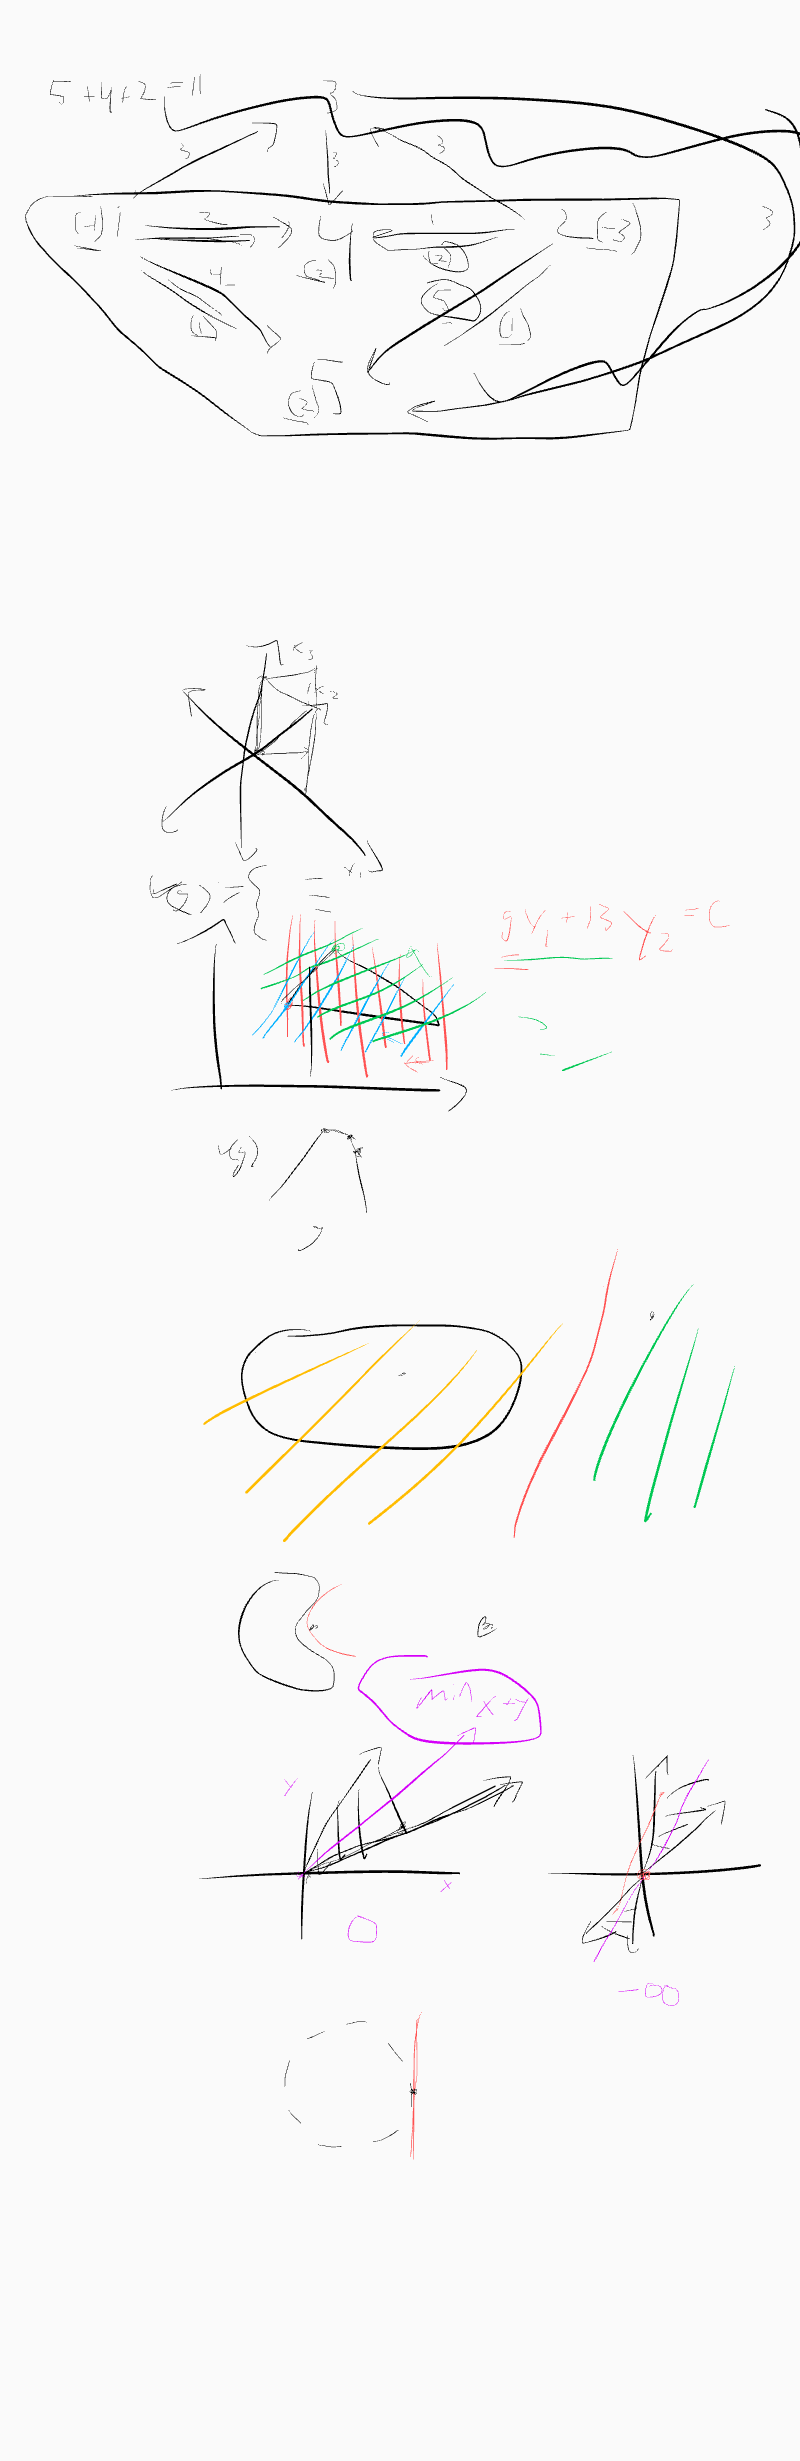